In [91]:
import rasterio
from rasterio.plot import show
import pyproj
from matplotlib import pyplot
import numpy as np

In [50]:
pyproj.database.get_authorities()

['EPSG', 'ESRI', 'IAU_2015', 'IGNF', 'NKG', 'OGC', 'PROJ']

In [113]:
""" THIS ONE IS NOT CORRECT
PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["latitude_of_center",37.5],
    PARAMETER["longitude_of_center",-96],
    PARAMETER["standard_parallel_1",29.5],
    PARAMETER["standard_parallel_2",45.5],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["ESRI","102003"]]
"""

""" THIS ONE IS CORRECT
PROJCS["USA_Contiguous_Albers_Equal_Area_Conic_USGS_version",
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["latitude_of_center",23],
    PARAMETER["longitude_of_center",-96],
    PARAMETER["standard_parallel_1",29.5],
    PARAMETER["standard_parallel_2",45.5],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["ESRI","102039"]]




"""

''

In [114]:
crs = pyproj.CRS.from_string('ESRI:102039')

In [115]:
crs

<Projected CRS: ESRI:102039>
Name: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [118]:
fp = r'2024-05-30-00_00_2024-05-30-23_59_Sentinel-2_L1C_NDVI.tiff'
fp_2=r'D__CDL_NASS_DATA_CACHE_strawberries_santa_maria_example.tif'

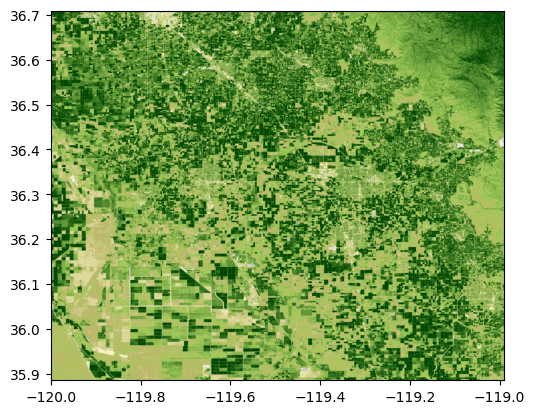

<Axes: >

In [19]:
img = rasterio.open(fp)
show(img)

In [13]:
print(img.bounds.left)
print(img.bounds.right)
print(img.bounds.bottom)
print(img.bounds.top)

-120.0006151199341
-118.99124622344972
35.88577529834571
36.70922685226851


In [21]:
img = rasterio.open(fp)
with img as src:
        x = (src.bounds.left + src.bounds.right) / 2.0
        y = (src.bounds.bottom + src.bounds.top) / 2.0

        for val in src.sample([(x, y)]): 
            print(val)

[0.74 0.72 0.42]


In [20]:
img = rasterio.open(fp)
coords = (-119.8,36.0)
with img as src:
        x = coords[0]
        y = coords[1]

        for val in src.sample([(x, y)]): 
            print(val)

[0.57 0.75 0.32]


In [22]:
img = rasterio.open(fp)
coords = (-119.99,35.9)
with img as src:
        x = coords[0]
        y = coords[1]

        for val in src.sample([(x, y)]): 
            print(val)

[0.69 0.76 0.38]


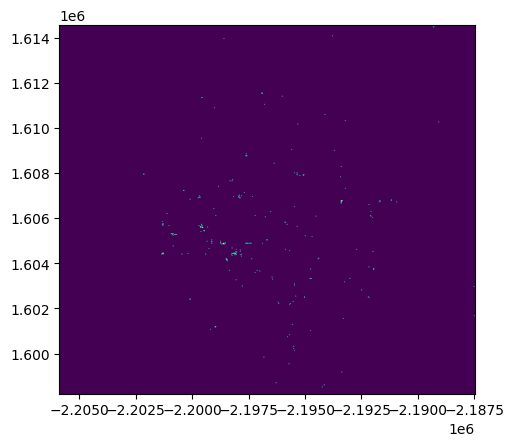

<Axes: >

In [119]:
img_2 = rasterio.open(fp_2)
show(img_2)

In [42]:
#bb for santa maria area: -2205867,1598214  //  -2187440,1614555
bb_bottom_left = (-2205867,1598214)
bb_top_right = (-2187440,1614555)
target_year = 2023
example_get_cdl=f"https://nassgeodata.gmu.edu/axis2/services/CDLService/GetCDLFile?year={target_year}&bbox={bb_bottom_left[0]},{bb_bottom_left[1]},{bb_top_right[0]},{bb_top_right[1]}"


In [43]:
print(example_get_cdl)

https://nassgeodata.gmu.edu/axis2/services/CDLService/GetCDLFile?year=2023&bbox=-2205867,1598214,-2187440,1614555


In [44]:
#returned cdl url: https://nassgeodata.gmu.edu/webservice/nass_data_cache/CDL_2023_clip_20240602140559_862836127.tif
#example CDL by values call: https://nassgeodata.gmu.edu/axis2/services/CDLService/ExtractCDLByValues?file=https://nassgeodata.gmu.edu/webservice/nass_data_cache/byfips/CDL_2018_19015.tif&values=1
example_cdl_url = r"https://nassgeodata.gmu.edu/webservice/nass_data_cache/CDL_2023_clip_20240602140559_862836127.tif"
target_crop = 221 #strawberries
example_cdl_with_crop = f"https://nassgeodata.gmu.edu/axis2/services/CDLService/ExtractCDLByValues?file={example_cdl_url}&values={target_crop}"


In [45]:
print(example_cdl_with_crop)

https://nassgeodata.gmu.edu/axis2/services/CDLService/ExtractCDLByValues?file=https://nassgeodata.gmu.edu/webservice/nass_data_cache/CDL_2023_clip_20240602140559_862836127.tif&values=221


In [ ]:
#returned crop filtered cdl url: https://nassgeodata.gmu.edu/webservice/nass_data_cache/extract_221_CDL_2023_clip_20240602140559_862836127.tif
#returned cdl coordinates are "USA Contiguous Albers Equal Area Conic USGS"

In [69]:
# example TIF of whole state of california filtered for strawberries
fp_crop_filtered_example=r"D__CDL_NASS_DATA_CACHE_extract_221_CDL_2023_stat_whole_state_ca.tif"

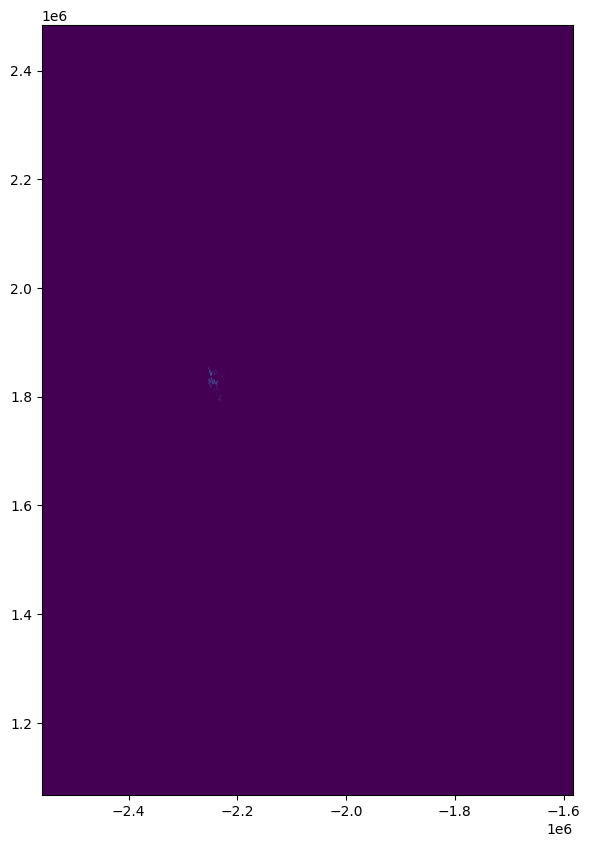

[0]
<class 'numpy.ndarray'>


In [109]:
#need to have downloaded snapshot of entire state
#plot CA state data
pyplot.figure(figsize=(10,10))
img_3 = rasterio.open(fp_crop_filtered_example)


show(img_3)

for val in img_3.sample([(x,y)]):
    print(val)
    print(type(val))

In [120]:
# testing coordinate systems conversion. This is the correct conversion.
# -2274195.0 1785375.0

x= -2274195
y= 1785375

transformer = pyproj.Transformer.from_crs('ESRI:102039','EPSG:4326')

for val in img_3.sample([(x,y)]):
    print(val)
    print(type(val))

print('NAD 1983 Albers contiguous USA:',(x,y))
print('WGS 84:',transformer.transform(x,y))




[0]
<class 'numpy.ndarray'>
NAD 1983 Albers contiguous USA: (-2274195, 1785375)
WGS 84: (36.31295305374894, -121.8799247006499)


In [88]:
left_bound = img_3.bounds.left
right_bound = img_3.bounds.right
top_bound = img_3.bounds.top
bottom_bound = img_3.bounds.bottom

print(left_bound,right_bound,top_bound,bottom_bound)

-2559495.0 -1582605.0 2483535.0 1067265.0


In [94]:
# see how much of entire CA strawberry mask has values
data = img_3.read(1) 
count = np.sum(data > 1)
count_zeros = np.sum(data == 0)

print(f"Number of pixels with values greater than 1: {count}")
print(f"Number of pixels with values equal to zero: {count_zeros}")

Number of pixels with values greater than 1: 53721
Number of pixels with values equal to zero: 1537212946


In [96]:
# updated sample area determined from visual analysis of above tests
fp_sample_area=r"example_strawberry_focus_area.tif"
sample_area = rasterio.open(fp_sample_area)

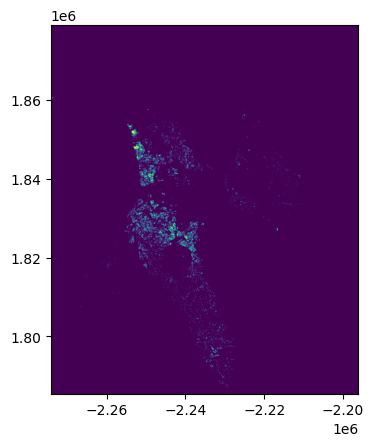

<Axes: >

In [99]:
show(sample_area)

In [100]:
# determine bounds of updated sample area
left_bound = sample_area.bounds.left
right_bound = sample_area.bounds.right
top_bound = sample_area.bounds.top
bottom_bound = sample_area.bounds.bottom

print("Bounding Box Lower Left:", left_bound,bottom_bound)
print("Bounding Box Upper Right:",right_bound,top_bound)

Bounding Box Lower Left: -2274195.0 1785375.0
Bounding Box Upper Right: -2196105.0 1879155.0


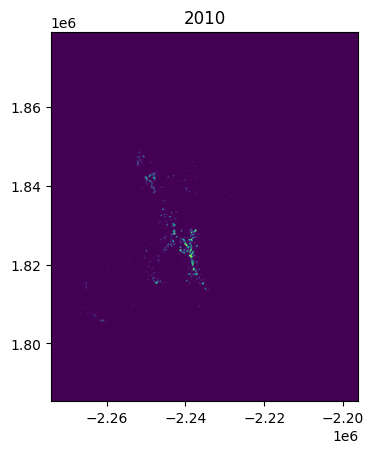

Number of pixels with values greater than 1: 12769
Number of pixels with values equal to zero: 8124209


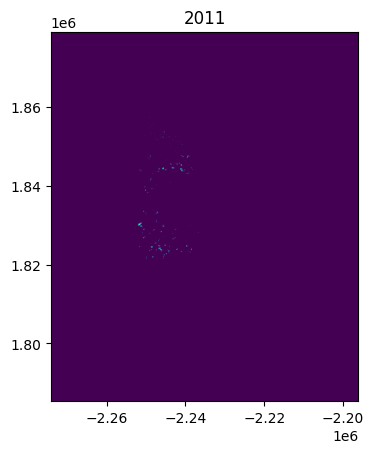

Number of pixels with values greater than 1: 2508
Number of pixels with values equal to zero: 8134470


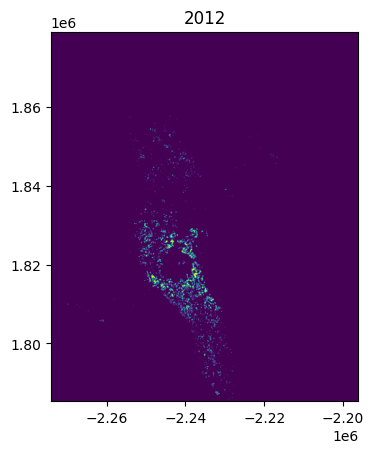

Number of pixels with values greater than 1: 49671
Number of pixels with values equal to zero: 8087307


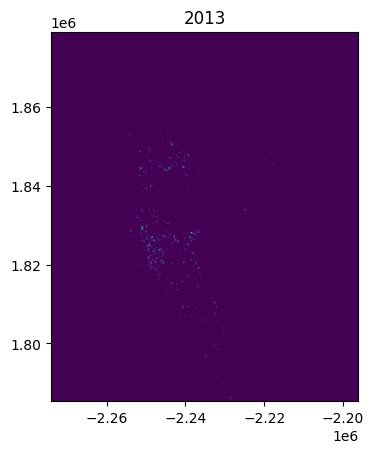

Number of pixels with values greater than 1: 6302
Number of pixels with values equal to zero: 8130676


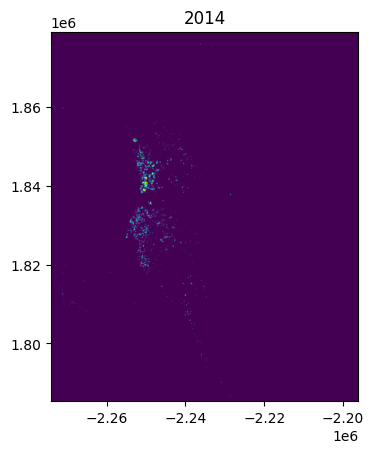

Number of pixels with values greater than 1: 19224
Number of pixels with values equal to zero: 8117754


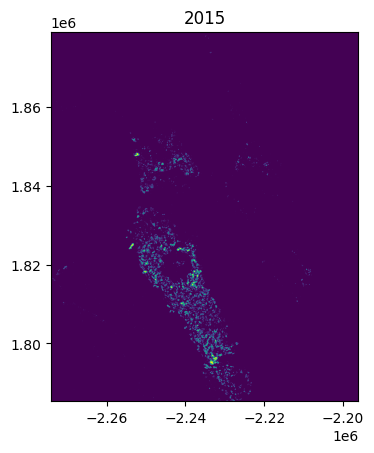

Number of pixels with values greater than 1: 56953
Number of pixels with values equal to zero: 8080025


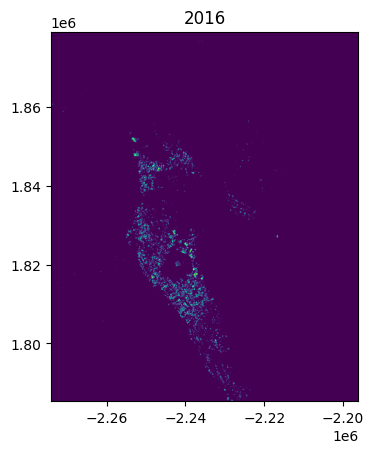

Number of pixels with values greater than 1: 51685
Number of pixels with values equal to zero: 8085293


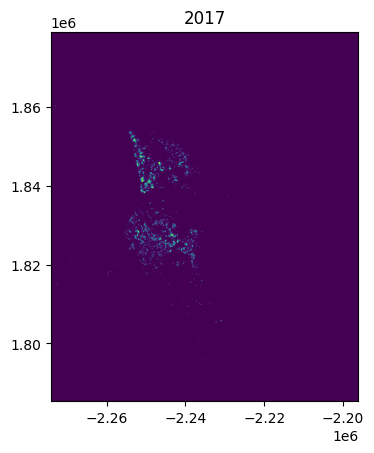

Number of pixels with values greater than 1: 26532
Number of pixels with values equal to zero: 8110446


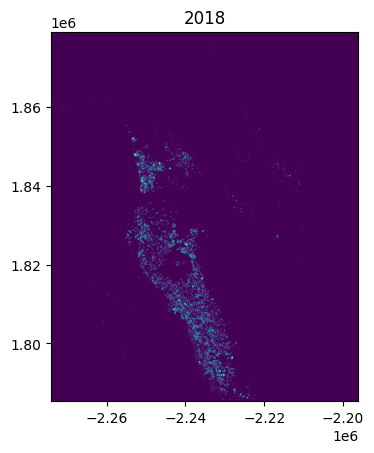

Number of pixels with values greater than 1: 71795
Number of pixels with values equal to zero: 8065183


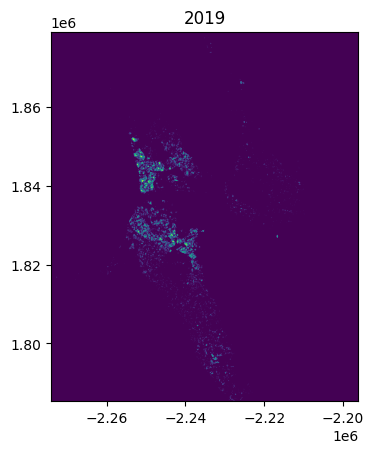

Number of pixels with values greater than 1: 46503
Number of pixels with values equal to zero: 8090475


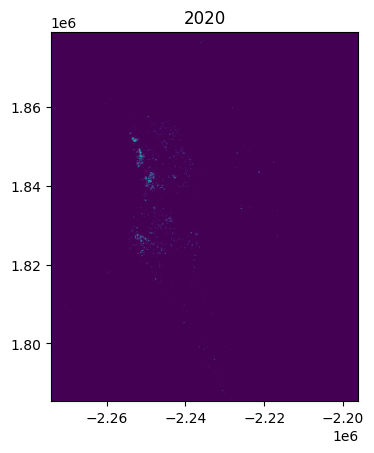

Number of pixels with values greater than 1: 8133
Number of pixels with values equal to zero: 8128845


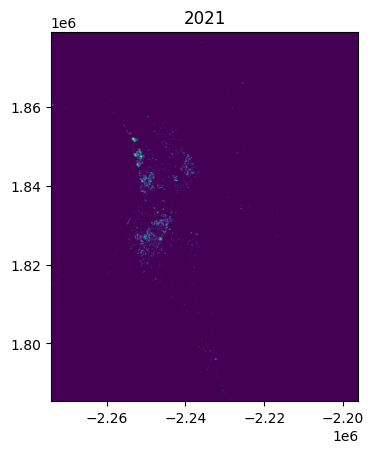

Number of pixels with values greater than 1: 16860
Number of pixels with values equal to zero: 8120118


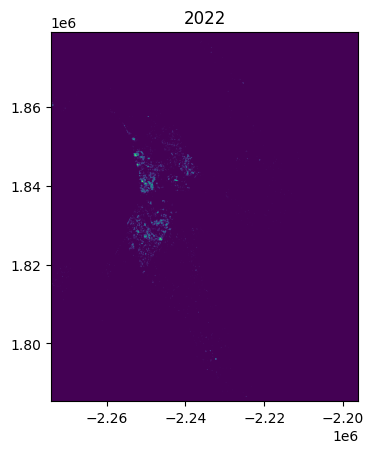

Number of pixels with values greater than 1: 15337
Number of pixels with values equal to zero: 8121641


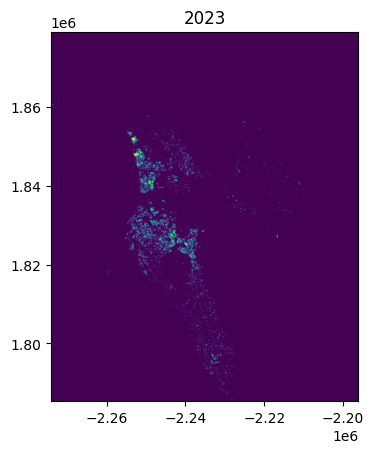

Number of pixels with values greater than 1: 52766
Number of pixels with values equal to zero: 8084212


In [112]:
for year in range(2010,2024):
    year_str=str(year)
    fp=f"cropscape_strawberries_{year_str}.tif"
    image = rasterio.open(fp)
    pyplot.title(year_str)
    show(image)
    data = image.read(1) 
    count = np.sum(data > 1)
    count_zeros = np.sum(data == 0)

    print(f"Number of pixels with values greater than 1: {count}")
    print(f"Number of pixels with values equal to zero: {count_zeros}")



    

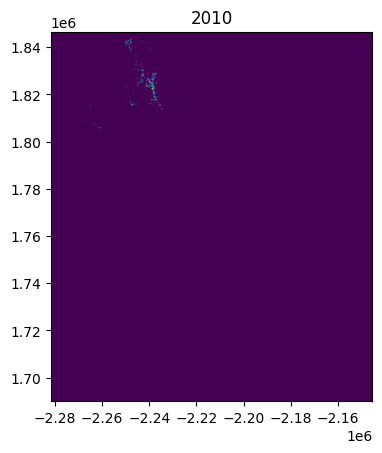

Number of pixels with values greater than 1: 12238
Number of pixels with values equal to zero: 23711986


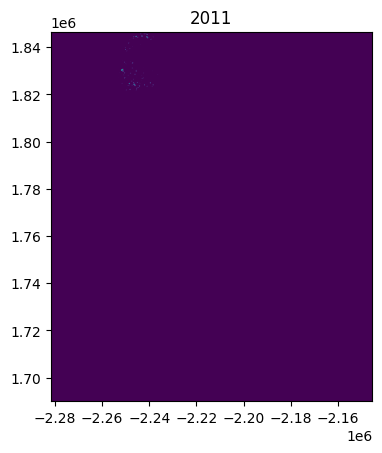

Number of pixels with values greater than 1: 2215
Number of pixels with values equal to zero: 23722009


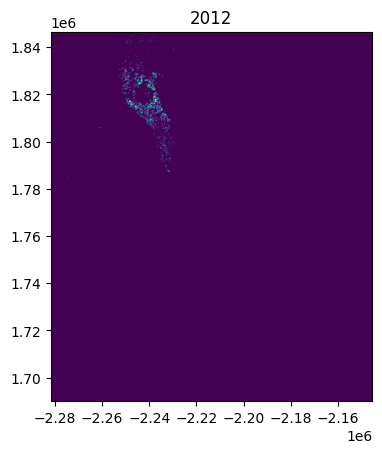

Number of pixels with values greater than 1: 48298
Number of pixels with values equal to zero: 23675926


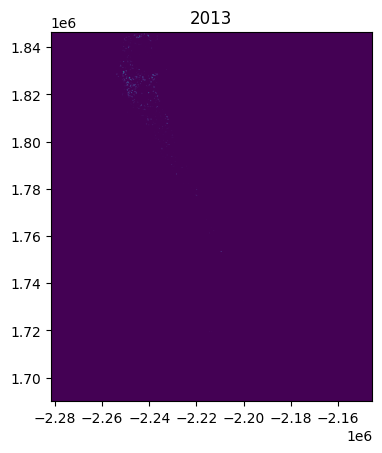

Number of pixels with values greater than 1: 5415
Number of pixels with values equal to zero: 23718809


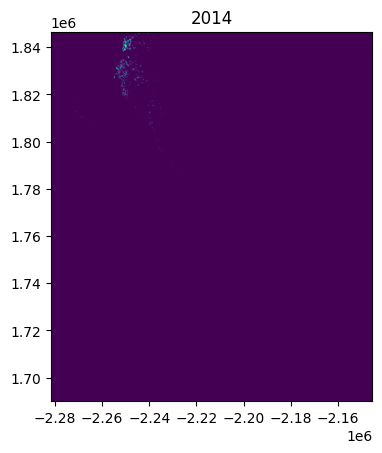

Number of pixels with values greater than 1: 14634
Number of pixels with values equal to zero: 23709590


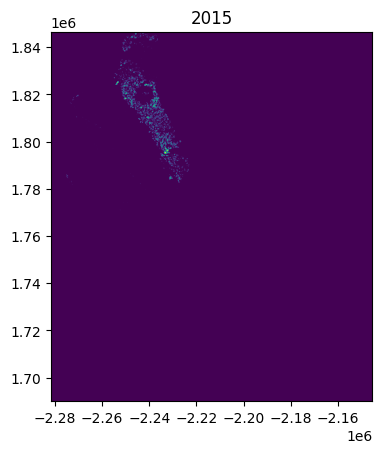

Number of pixels with values greater than 1: 54051
Number of pixels with values equal to zero: 23670173


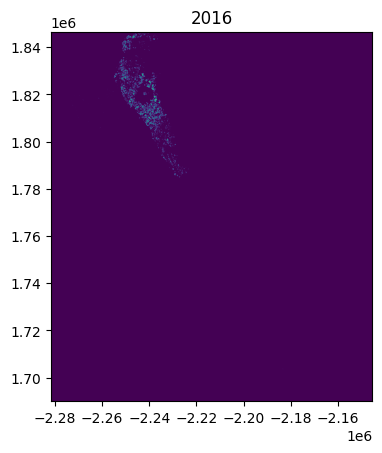

Number of pixels with values greater than 1: 44577
Number of pixels with values equal to zero: 23679647


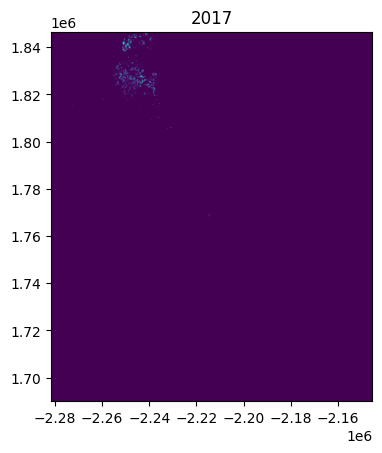

Number of pixels with values greater than 1: 20490
Number of pixels with values equal to zero: 23703734


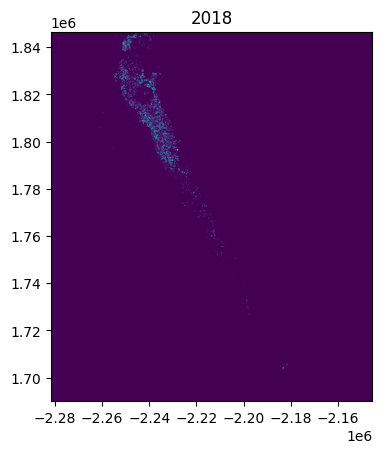

Number of pixels with values greater than 1: 67705
Number of pixels with values equal to zero: 23656519


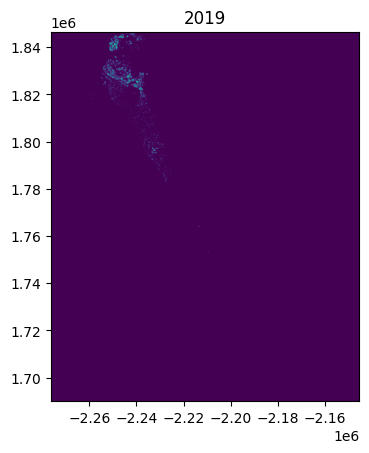

Number of pixels with values greater than 1: 36603
Number of pixels with values equal to zero: 22742620


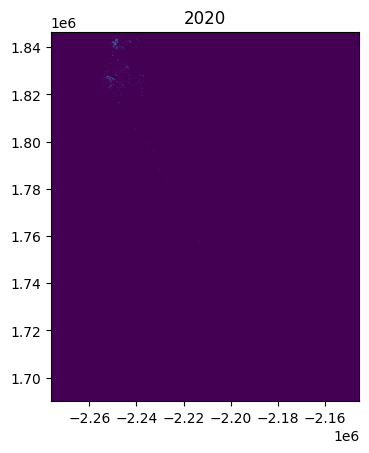

Number of pixels with values greater than 1: 5192
Number of pixels with values equal to zero: 22774031


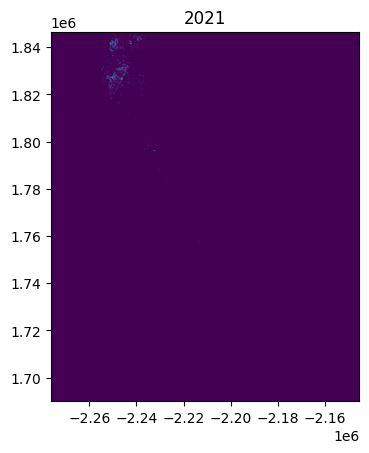

Number of pixels with values greater than 1: 11945
Number of pixels with values equal to zero: 22767278


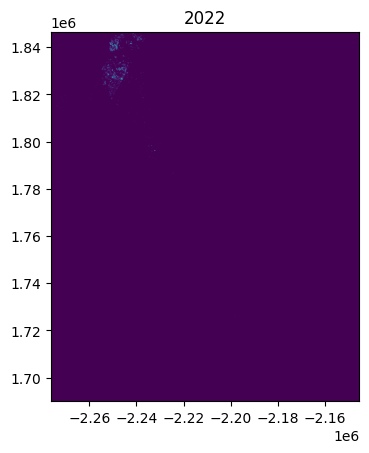

Number of pixels with values greater than 1: 11614
Number of pixels with values equal to zero: 22767609


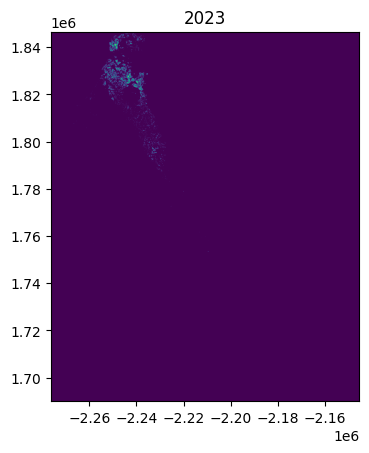

Number of pixels with values greater than 1: 41499
Number of pixels with values equal to zero: 22737724


In [117]:
for year in range(2010,2024):
    year_str=str(year)
    fp=f"cropscape-strawberries-06053-{year_str}.tif"
    image = rasterio.open(fp)
    pyplot.title(year_str)
    show(image)
    data = image.read(1) 
    count = np.sum(data > 1)
    count_zeros = np.sum(data == 0)

    print(f"Number of pixels with values greater than 1: {count}")
    print(f"Number of pixels with values equal to zero: {count_zeros}")



    